In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg16 import preprocess_input

# دریافت داده‌های cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# پیش‌پردازش داده‌ها
train_images = tf.image.resize(train_images, (32, 32)) / 255.0
test_images = tf.image.resize(test_images, (32, 32)) / 255.0

# تبدیل تصاویر به فرمت مناسب برای VGG16
train_images = preprocess_input(train_images)
test_images = preprocess_input(test_images)

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# ایجاد مدل VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# قفل لایه‌های مدل تا لایه آخر
for layer in base_model.layers[:-1]:
    layer.trainable = False

# افزودن لایه‌های جدید برای طبقه‌بندی تصاویر CIFAR-10
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# کامپایل مدل
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# آموزش مدل
history = model.fit(train_images, train_labels, epochs=20, batch_size=512, validation_data=(test_images, test_labels))

# ارزیابی مدل
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/20
98/98 [==============================] - 770s 8s/step - loss: 2.5900 - accuracy: 0.1253 - val_loss: 2.2255 - val_accuracy: 0.1642
Epoch 2/20
98/98 [==============================] - 757s 8s/step - loss: 2.1927 - accuracy: 0.1903 - val_loss: 2.1579 - val_accuracy: 0.2143
Epoch 3/20
98/98 [==============================] - 731s 7s/step - loss: 2.1375 - accuracy: 0.2182 - val_loss: 2.1100 - val_accuracy: 0.2352
Epoch 4/20
98/98 [==============================] - 730s 7s/step - loss: 2.1000 - accuracy: 0.2352 - val_loss: 2.0910 - val_accuracy: 0.2141
Epoch 5/20
98/98 [==============================] - 707s 7s/step - loss: 2.0683 - accuracy: 0.2482 - val_loss: 2.0765 - val_accuracy: 0.2435
Epoch 6/20
98/98 [==============================] - 733s 7s/step - loss: 2.0421 - accuracy: 0.2584 - val_loss: 2.0204 - val_accuracy: 0.2695
Epoch 7/20
98/98 [==============================] - 729s 7s/step - loss: 2.0146 - accurac

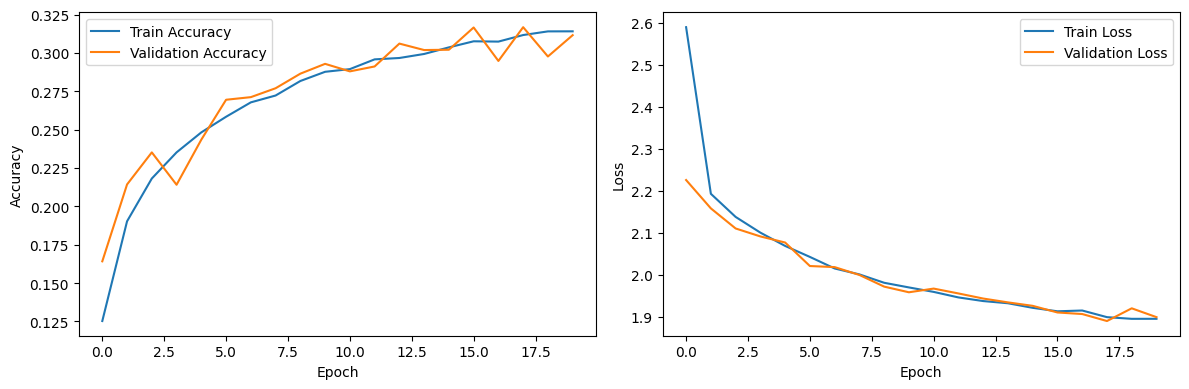

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# نمودار دقت
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# نمودار خطا
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# نمایش نمودارها
plt.tight_layout()
plt.show()


In [3]:
from sklearn.metrics import classification_report

# ارزیابی مدل
y_pred = model.predict(test_images)
y_pred_classes = tf.argmax(y_pred, axis=1)
y_true_classes = tf.argmax(test_labels, axis=1)

# گزارش ارزیابی
print(classification_report(y_true_classes, y_pred_classes))


313/313 [==============================] - 145s 464ms/step
              precision    recall  f1-score   support

           0       0.37      0.06      0.10      1000
           1       0.38      0.44      0.41      1000
           2       0.40      0.00      0.00      1000
           3       0.24      0.06      0.10      1000
           4       0.22      0.40      0.28      1000
           5       0.39      0.35      0.37      1000
           6       0.24      0.60      0.35      1000
           7       0.36      0.24      0.29      1000
           8       0.37      0.58      0.45      1000
           9       0.39      0.38      0.39      1000

    accuracy                           0.31     10000
   macro avg       0.34      0.31      0.27     10000
weighted avg       0.34      0.31      0.27     10000



In [12]:
base_model = VGG16(weights='imagenet')
for layer in base_model.layers:
    print(layer.name)


input_4
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool
flatten
fc1
fc2
predictions


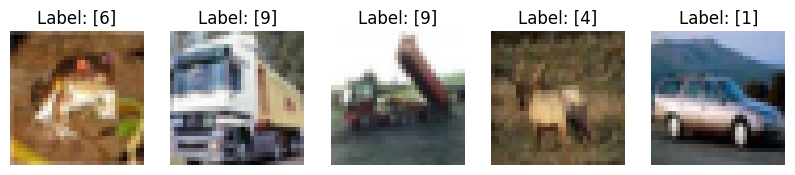

In [15]:
import matplotlib.pyplot as plt

# تصاویری که می‌خواهید نمایش دهید
images_to_display = train_images[:5]  # 5 تصویر ابتدایی از داده‌های آموزشی

# برچسب‌های متناظر با تصاویر
labels_to_display = train_labels[:5]  # برچسب‌های متناظر با 5 تصویر اول

# نمایش تصاویر با برچسب‌های متناظر
plt.figure(figsize=(10, 5))
for i in range(len(images_to_display)):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images_to_display[i])
    plt.title(f'Label: {labels_to_display[i]}')
    plt.axis('off')
plt.show()


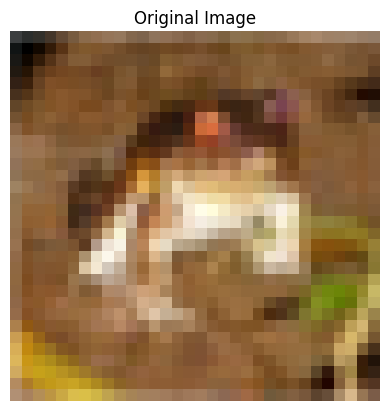

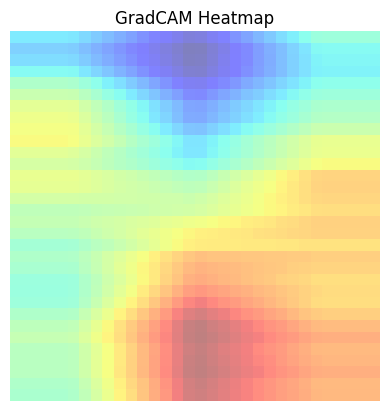

In [28]:
from tf_explain.core.grad_cam import GradCAM

# انتخاب یک تصویر از داده‌های آموزشی به عنوان ورودی
selected_image = train_images[0]  # می‌توانید هر تصویر دیگری را انتخاب کنید

# تبدیل تصویر به ورودی قابل پردازش برای مدل
img = np.expand_dims(selected_image, axis=0)

# ایجاد یک شیء GradCAM
explainer = GradCAM()

# محاسبه heatmap
heatmap = explainer.explain((img, None), model, class_index=0)

# تغییر اندازه heatmap برای همخوانی با ابعاد تصویر اصلی
heatmap = cv2.resize(heatmap[0], (selected_image.shape[1], selected_image.shape[0]))

# نمایش تصویر اصلی و Heatmap
plt.imshow(selected_image)
plt.title('Original Image')
plt.axis('off')
plt.show()

plt.imshow(heatmap, cmap='jet', alpha=0.5)
plt.title('GradCAM Heatmap')
plt.axis('off')
plt.show()
